__#7. Магические методы setattr, getattribute, getattr и delattr__

свойства и методы - атрибуты класса

атрибуты класса являются общими для всех его экземпляров, так как они содержат ссылку на них

мы не можем к атрибутам класса обращаться по именам, нужно или через self или через название класса (не рекомендуется)

def set_bound(self, left):
        self.MIN_COORD = left
не изменяет атрибут класса, а создает новое локальное свойство для экземпляра. Правильнее использовать @classmethod и ссылку на класс (cls)

setattr(self, key, value) - автоматически вызывается при изменении свойства key класса. Можем запретить создавать какой-либо локальный атрибут в экземплярах класса.

getattribute(self, item) - автоматически вызывается при получении свойства класса с именем item. Используется например для запрета обращения к какому-либу атрибуту

getattr(self, item) - автоматически вызывается при получении несуществующего свойства item класса. Ну эт используется если там чет нужно продумать при обращении к несуществующему элементу класса. Чтоб допустим возвращалось False, а не исключение дропалось.

delattr(self, item) - автоматически вызывается при удалении свйоства item (не важно существует оно или нет). Контролировать удаление тех или иных атрибутов

In [82]:
class Point():
    MAX_COORD = 100
    MIN_COORD = 0

    def __init__(self, x, y):
        self.x = x
        self.y = y 
    
    def set_coord(self, x, y):
        self.x = x 
        self.y = y

    @classmethod
    def set_bound(cls, left):
        cls.MIN_COORD = left

    def __getattribute__(self, item):
        if item == "x":
            raise ValueError("доступ запрещен")
        else: 
            return object.__getattribute__(self, item)

    def __setattr__(self, name, value):
        if name == 'z': 
            raise AttributeError("недопустимое имя атрибута")
        else:
            object.__setattr__(self, name, value)

    def __getattr__(self, name):
        return False

    def __delattr__(self, name):
        object.__delattr__(self, name)

pt1 = Point(1, 2)
pt1.set_bound(100)
print(pt1.__dict__)
print(Point.__dict__)

a = pt1.y
print(a)

print(pt1.yy)

del Point

{'x': 1, 'y': 2}
{'__module__': '__main__', '__firstlineno__': 1, 'MAX_COORD': 100, 'MIN_COORD': 100, '__init__': <function Point.__init__ at 0x0000026A7F3FDDA0>, 'set_coord': <function Point.set_coord at 0x0000026A7F3FD620>, 'set_bound': <classmethod(<function Point.set_bound at 0x0000026A7F3FC180>)>, '__getattribute__': <function Point.__getattribute__ at 0x0000026A7F3FE020>, '__setattr__': <function Point.__setattr__ at 0x0000026A7F3FE0C0>, '__getattr__': <function Point.__getattr__ at 0x0000026A7F3FE160>, '__delattr__': <function Point.__delattr__ at 0x0000026A7F3FE200>, '__static_attributes__': ('x', 'y'), '__dict__': <attribute '__dict__' of 'Point' objects>, '__weakref__': <attribute '__weakref__' of 'Point' objects>, '__doc__': None}
2
False


__#8. Паттерн "Моносостояние"__

Идея заключается в том, что изменение атрибутов класса в каком-либо объекте, изменится у всех объектов

Очень редко используется на практике

In [83]:
class ThreadData:
    __shared_attrs= {
        'name': 'thread_1',
        'data': {},
        'id' : 1
    }

    def __init__(self):
        self.__dict__ = self.__shared_attrs

th1 = ThreadData()
th2 = ThreadData()

th1.id = 3 
print(th2.id)

th1.attr_new = 'new_attr'

del ThreadData

3


__#9. Свойства property. Декоратор @property__

Короче переопределяет функции в зависимости от функционала, например чтоб при вызове одной функции одним способом можно получить значение (геттер), а также можно и записать значения (сеттер) и тому подобное 

У свойства property приоритет выше, чем при обращении к приватному атрибуту экземпляра класса.

In [84]:
class Person:
    def __init__(self, name, old):
        self.__name = name
        self.__old = old 

    def get_old(self):
        return self.__old 
    
    def set_old(self, old):
        self.__old = old 

    old = property(get_old, set_old)

p = Person('Сергей', 20)

a = p.old
print(a)

p.old = 35 
print(p.old)


del Person 

20
35


In [85]:
# как чаще всего используют все на практике:
class Person:
    def __init__(self, name, old):
        self.__name = name
        self.__old = old 

    @property
    def old(self):
        return self.__old 
    
    @old.setter
    def old(self, old):
        self.__old = old

    @old.deleter 
    def old(self):
        del self.__old 


p = Person('Сергей', 20)

a = p.old
print(a)

p.old = 35 
print(p.old)


del Person 

20
35


__#10. Пример использования объектов property__

if len(s.strip(letters)) != 0:  - если fio содержит разрешенные символы из letters, то стрип их все удалит и длина будет равна нулю

In [86]:
from string import ascii_letters

class Person: 
    S_RUS = 'йцукенгшщзхъфывапролджэячсмитьбю'
    S_RUS_UPPER = S_RUS.upper()
    
    def __init__(self, fio, old, ps, weight): 
        self.verify_fio(fio)
        self.verify_old(old)
        self.verify_ps(ps)
        self.verify_weight(weight)

        self.__fio = fio.split()
        self.__old = old 
        self.__passport = ps 
        self.__weight = weight 

    @classmethod 
    def verify_fio(cls, fio):
        if type(fio) != str: 
            raise TypeError("ФИО должно быть строкой")
        
        f = fio.split() 
        if len(f) != 3: 
            raise TypeError("Неверный формат ФИО")
        
        letters = ascii_letters + cls.S_RUS + cls.S_RUS_UPPER
        for s in f: 
            if len(s) < 1:
                raise TypeError('В ФИО lолжен быть хотя бы один символ')
            if len(s.strip(letters)) != 0: 
                raise TypeError('В ФИО должны быть допустимые символы')
            
    @classmethod
    def verify_old(cls, old):
        if type(old) != int or old < 14 or old > 120:
            raise TypeError('Возраст должен быть целым числом в диапозоне [14; 120]')
        
    @classmethod
    def verify_weight(cls, weight):
        if type(weight) != float or weight < 20:
            raise TypeError('Вес должен быть вещественным числом больше 20')
        
    @classmethod 
    def verify_ps(cls, ps):
        if type(ps) != str: 
            raise TypeError('Паспорт должен быть строкой')
        
        s = ps.split()
        if len(s) != 2 or len(s[0]) != 4 or len(s[1]) != 6: 
            raise TypeError('Неверный формат паспорта')

        for p in s: 
            if not p.isdigit():
                raise TypeError('Серия и номер паспорта должны быть числами')

    @property
    def fio(self):
        return self.__fio 
    
    @property
    def old(self):
        return self.__old 
    
    @old.setter 
    def old(self, old):
        self.verify_old(old)
        self.__old = old 

    @property
    def weight(self):
        return self.__weight 
    
    @weight.setter 
    def weight(self, weight):
        self.verify_weight(weight)
        self.__weight = weight 

    @property
    def passport(self):
        return self.__passport 
    
    @passport.setter 
    def passport(self, ps):
        self.verify_ps(ps)
        self.__passport = ps 
    

p = Person('Балакирев Сергей Михайлович', 30, '1234 567890', 80.0)
p.old = 100 
p.passport = '4567 123456'
p.weight = 70.0
print(p.__dict__)

del Person

{'_Person__fio': ['Балакирев', 'Сергей', 'Михайлович'], '_Person__old': 100, '_Person__passport': '4567 123456', '_Person__weight': 70.0}


__#11. Дескрипторы (data descriptor и non-data descriptor)__

Non-data descriptor - класс у которого есть только геттер (имеет тот же приоритет, что и атрибуты класса)

Data descriptor - класс, у которого есть геттер, сеттер и делитер

крч очень помогают сократить код чтоб не писать по 100 проперти и для каждого пука сеттер и геттер

instance - экземпляр (экземпляр класса)
owner - владелец ( класс, от которого был создан экземпляр)

In [87]:
class Integer:
    @classmethod
    def verify_coord(cls, coord): 
        if type(coord) != int: 
            raise TypeError('Координата должна быть числом')
        
    def __set_name__(self, owner, name):
        self.name = "_" + name
 
    def __get__(self, instance, owner):
        return getattr(instance, self.name)
      
    def __set__(self, instance, value):
        self.verify_coord(value)
        print(f"__set__: {self.name} = {value}")
        setattr(instance, self.name, value)

class Point3D:
    x = Integer()
    y = Integer()
    z = Integer()
    
    def __init__(self, x, y, z):
        self.x = x 
        self.y = y 
        self.z = z

p = Point3D(1, 2, 3)
print(p.__dict__)

del Point3D

__set__: _x = 1
__set__: _y = 2
__set__: _z = 3
{'_x': 1, '_y': 2, '_z': 3}


__#12. Магический метод call. Функторы и классы-декораторыl__

При вызове класса или же при скобках () - вызывается метод call, где вызывается метод new и init.

Без определения магического метода внутри класса, вызывать экземпляр класса так не получится:
c = Counter()
c() <- ошибка

Поэтому и используется call для таких случаев. Классы которые себя так ведут называются функторами

In [88]:
class Counter: 
    def __init__(self): 
        self.__counter = 0 

    def __call__(self, step = 1, *args, **kwds):
        print('__call__')
        self.__counter +=  step
        return self.__counter

c = Counter()
c2 = Counter()
c()
c()
res = c(10)
res2 = c2(-5)
print(res, res2)

del Counter

__call__
__call__
__call__
__call__
12 -5


In [89]:
class StripChars: 
    def __init__(self, chars): 
        self.__chars = chars 

    def __call__(self, *args, **kwds):
        if not isinstance(args[0], str):
            raise TypeError('Аргумент должен быть строкой')
        
        return args[0].strip(self.__chars)

s1 = StripChars('?:!.;')
res = s1('Hello World!')
print(res)

del StripChars

Hello World


__#13. Магические методы str, repr, len, abs__

str() используется для отображения информации об объекте класса для пользователей 

repr() используется для отображения информации об объекте класса в режиме отладки для разработчиков

len() позволяет применять функцию len() к экземплярам класса

abs() позволяет применять функцию abs() к экземплярам класса

In [90]:
class Cat:
    def __init__(self, name):
        self.name = name

    def __repr__(self):
        return f"{self.__class__} : {self.name}"
    
    def __str__(self):
        return self.name

cat = Cat('Васька')
print(cat)
str(cat)

del Cat

Васька


In [91]:
class Point:
    def __init__(self, *args): 
        self.__cords = args 

    def __len__(self):
        return len(self.__cords)
    
    def __abs__(self):
        return list(map(abs, self.__cords))

p = Point(1, -2, -5)
print(len(p))
print(abs(p))

del Point

3
[1, 2, 5]


__#14 Магические методы add, sub, mul, truediv__ 

add - сложение. для c1 = 100 + c1, можно использовать radd чтоб не было ошибок, а для c1 += 100 iadd

sub - вычитание 

mul - умножение

truediv - вычитание

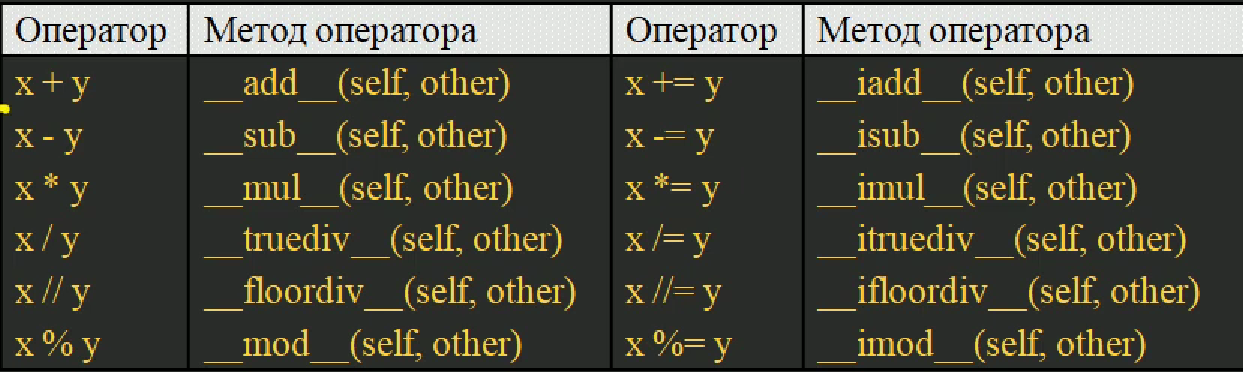

In [92]:
class Clock:
    __DAY = 86400

    def __init__(self, seconds: int):
        if not isinstance(seconds, int): 
            raise TypeError("Секунд должны быть целым числом")
        self.seconds = seconds % self.__DAY

    def get_time(self):
        s = self.seconds % 60 
        m = (self.seconds // 60) % 60 
        h = (self.seconds // 3600) % 24 
        return f"{self.__get_formatted(h)}:{self.__get_formatted(m)}:{self.__get_formatted(s)}"
    
    @classmethod 
    def __get_formatted(cls, x): 
        return str(x).rjust(2, "0")
    
    def __add__(self, other):
        if not isinstance(other, (int, Clock)):
            raise ArithmeticError("Число должно быть целочисленным")
        sc = other 
        if isinstance(other, Clock): 
            sc = other.seconds

        return self.__class__(self.seconds + sc)
    
    def __radd__(self, other):
        return self + other

    def __iadd__(self, other): 
        return self.__class__(self.seconds + other)
    
    
c1 = Clock(1000)
c1 = c1 + 100 #эквивалент c1.__add__(100)
print(c1.get_time())
c2 = Clock(2000)
c3 = Clock(3000)
c4 = c2 + c1 + c3
print(c4.get_time())
c1 = 100 + c1 
print(c1.get_time())
c1 += 100 
print(c1.get_time())

del Clock

00:18:20
01:41:40
00:20:00
00:21:40


__#15. Методы сравнений eq, ne, lt, gt и другие__

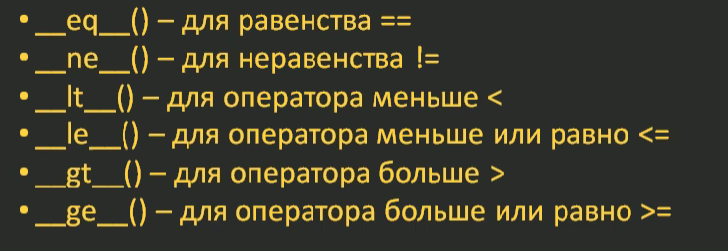

c1 != c2 тоже самое, что и (c1 == c2), если в классе нет определения ne, то будет вызываться eq

тоже самое с для le т gt

а также для le и ge

In [93]:
class Clock: 
    __DAY = 86400 

    def __init__(self, seconds: int): 
        self.seconds = seconds % self.__DAY

    @classmethod 
    def __verify_data(self, other):
        if not isinstance(other, (int, Clock)):
            raise TypeError("Операнд справа должен иметь тип int или Clock")
        
        return other if isinstance(other, int) else other.seconds
     
    def __eq__(self, other):
        sc = self.__verify_data(other)
        return self.seconds == sc

    def __lt__(self, other):
        sc = self.__verify_data(other)
        return self.seconds < sc
    
    def __le__(self, other):
        sc = self.__verify_data(other)
        return self.seconds <= sc
    
c1 = Clock(1000)
c2 = Clock(2000)
print(c1 == c2)
print(c1 < 1000)
print(c1 >= c2)

del Clock

False
False
False


__#16. Магические методы eq и hash__

Если объекты равны, то равны их хэши 

Равные хэши не гарантируют равенство объектов 

Если хэши не равны, то объекты точно не равны

Изменяемые объекты являются не хэшируемыми 

In [94]:
class Point: 
    def __init__(self, x, y): 
        self.x = x
        self.y = y 

    def __eq__(self, other):
        return self.x == other.x and self.y == other.y
    
    def __hash__(self): 
        return hash((self.x, self.y))

p1 = Point(1, 2)
p2 = Point(1, 2)
print (hash(p1), hash(p2), sep = '\n')
print(p1 == p2)

del Point

-3550055125485641917
-3550055125485641917
True


__#17. Магический метод bool определения правдивости объектов__

метод len вызывается __функцией!__ bool, если не определен магический метод bool()

метод bool вызывается в приоритетном порядке __функцией!__ bool()

In [95]:
class Point(): 
    def __init__(self, x, y): 
        self.x = x 
        self.y = y

    def __len__(self):
        print("__len__")
        return self.x * self.x + self.y * self.y

    def __bool__(self): 
        print('__bool__')
        return self.x == self.y 

p = Point(10, 10)
print(bool(p))

del Point

__bool__
True


#18. Магические методы getitem, setitem и delitem__

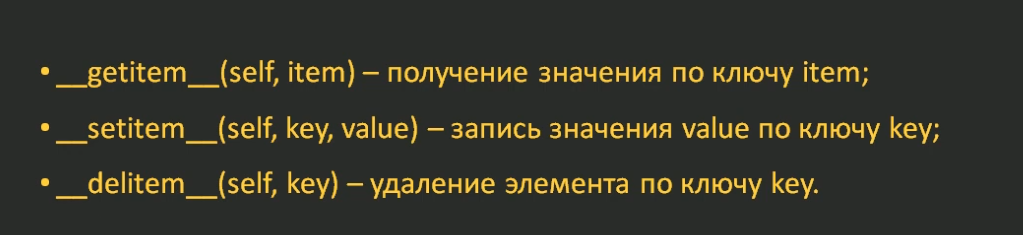

In [ ]:
class Student: 
    def __init__(self, name, marks):
        self.name = name 
        self.marks = list(marks)

    def __getitem__(self, item): 
        return self.marks[item]
    
    def __setitem__(self, key, value): 
        if not isinstance(key, int) or key < 0:
            raise TypeError('Индекс должен быть целым неотрицательным числом')
        
        if key >= len(self.marks): 
            off = key + 1 - len(self.marks)
            self.marks.extend([None] * off)

        self.marks[key] = value 

    def __delitem__(self, key): 
        if not isinstance(key, int): 
            raise TypeError("Индекс должен быть целым неотрицательным числом")

s1 = Student('Сергей', [5, 5, 3, 2, 5])
print(s1[2])
s1[6] = 4
print(s1.marks)

3
[5, 5, 3, 2, 5, None, 4]


__#19. Магические методы iter и next__

iter(self) - получение итератора для перебора объекта 

next(self) - переход к следующему значению и его считывание 

 функция next неявно вызывает метод next

In [ ]:
class FRange: 
    def __init__(self, start=0.0, stop=0.0, step=1.0): 
        self.start = start 
        self.stop = stop 
        self.step = step 
        self.value = self.start - self.step
    
    def __iter__(self): 
        self.value = self.start - self.step
        return self 
    

    def __next__(self):
        if self.value + self.step < self.stop: 
            self.value += self.step 
            return self.value 
        else:
            raise StopIteration 
        
class FRange2D:
    def __init__(self, start = 0.0, stop =0.0, step = 1.0, rows = 5): 
        self.rows = rows 
        self.fr = FRange(start, stop, step)

    def __iter__(self): 
        self.value = 0 
        return self
        
    def __next__(self): 
        if self.value < self.rows: 
            self.value += 1 
            return iter(self.fr) 
        else:
            raise StopIteration

fr = FRange(0, 2, 0.5)
print(next(fr)) # эквивалент print(fr.__next__())
for x in fr:
    print(x, end = " ")

fr = FRange2D(0, 2, 0.5, 2)
for row in fr:
    for x in row: 
        print(x, end=" ")
    print()    

0.0
0.0
0.5
1.0
1.5
0.0 0.5 1.0 1.5 
0.0 0.5 1.0 1.5 
